In [19]:
# The input of this program is a .csv data sheet
# set up in a special format (see given example). 
# The program standardizes the input data then 
# performs PCA analysis on it. Outputs PCA graph 
# and covariance matrix. 

#import libraries

import pandas as pd
from matplotlib import transforms
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
from numpy import savetxt
import numpy as np

# read excel (examples of how to set up your data given in folder)
data = pd.read_csv("../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/datah.csv") 

# scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

#print(scaled_data)

#perform PCA fit and decompose the data
from sklearn.decomposition import  PCA
pca = PCA(n_components = 30)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)      

#print(x_pca.shape)
label= pd.read_csv("../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/label-h.csv")
#labelO= pd.read_csv("./pca/labelO.csv")
#labelH=pd.read_csv("./pca/labelH.csv")
#plot figure


In [1]:


from matplotlib.pyplot import figure, show
import numpy


ax = plt.axes(projection='3d')
colorsh=['black','red','orange','gold','pink',
        'green','skyblue','blue','brown','lime',
        'cyan','grey','darkslategrey','tan','lightsteelblue',
        'navy','violet','cornflowerblue','palegreen','lightsalmon',
        'sandybrown','peru','lavender','tomato','chocolate',
        'khaki','antiquewhite','indigo','teal','bisque','olive']

colorso=['tomato','violet','lightgreen','gold','pink',
        'purple','green','darkgreen','brown','lime',
        'cyan','grey','red','indianred','maroon',
        'navy','violet','cornflowerblue','palegreen','lightsalmon',
        'sandybrown','skyblue','lavender','chocolate','black',
        'firebrick','antiquewhite','indigo','teal','bisque',
         'olive','sandybrown','orange','darkseagreen','rosybrown','white']

plt.figure(figsize=(20,20))
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.scatter(x_pca[:,0],x_pca[:,1], x_pca[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(colorso))

from schnetpack.datasets import QM9

count=0
for i in range(x_pca.shape[0]):
    if 0.0 < x_pca[i][1] < 0.1:
        count=count+1
print(count)       
    
#ax.view_init(0,30) 

methyl = mpatches.Patch(color='skyblue', label='methyl')
methylene = mpatches.Patch(color='green', label='methylene')
methine = mpatches.Patch(color='lime',label='methine')
alkene = mpatches.Patch(color='tan',label='alkene')
primaryamine = mpatches.Patch(color='tomato',label='primary-amine')
secondaryamine = mpatches.Patch(color='chocolate',label='secondary-amine')
alcohols = mpatches.Patch(color='teal',label='alcohols')
methylO = mpatches.Patch(color='gold',label='methyl-O')
methylN = mpatches.Patch(color='pink',label='methyl-N')
methyleneN = mpatches.Patch(color='orange',label='methylene-N')
methyleneO = mpatches.Patch(color='blue',label='methylene-O')
methineN = mpatches.Patch(color='cyan',label='methine-N')
methineO = mpatches.Patch(color='grey',label='methine-O')
alkeneO = mpatches.Patch(color='lightsteelblue',label='alkene-O')
alkeneN = mpatches.Patch(color='navy',label='alkene-N')

aldehyde = mpatches.Patch(color='violet', label='aldehyde')
terminalamide = mpatches.Patch(color='lightgreen', label='terminal-amide')
terminalester = mpatches.Patch(color='gold',label='terminal-ester')
internalester = mpatches.Patch(color='pink',label='internal-ester')
ketone = mpatches.Patch(color='purple',label='ketone')
internalamide = mpatches.Patch(color='green',label='internal-amide')
urea = mpatches.Patch(color='darkgreen',label='urine')
amideester = mpatches.Patch(color='darkseagreen',label='amide-ester')
primaryalcohol = mpatches.Patch(color='red',label='primary-alcohol')
secondaryalcohol = mpatches.Patch(color='indianred',label='secondary-alcohol')
tertiaryalcohol = mpatches.Patch(color='maroon',label='tertiary-alcohol')
ether = mpatches.Patch(color='orange',label='ether')
alcoholamine = mpatches.Patch(color='rosybrown',label='alcohol-amine')
hemiacetal = mpatches.Patch(color='black',label='hemiacetal')
alcoholalkene = mpatches.Patch(color='skyblue',label='alcohol-akene')

ax.legend(bbox_to_anchor=(1.5, 1.0),handles=[methyl,methylene,
                                             methine,arromatic,
                                             primaryamine,secondaryamine,
                                             alcohols,methylO,methylN,
                                             methyleneN,methyleneO,methineN,methineO,
                                             arromaticO,arromaticN])
#    ax.view_init(10,230)
ax.legend(bbox_to_anchor=(1.5, 1.0),handles=[aldehyde,terminalamide,
                                             terminalester,internalester,
                                             ketone,internalamide,
                                             urea,amideester,primaryalcohol,
                                             secondaryalcohol,tertiaryalcohol,
                                             ether,alcoholamine,
                                             hemiacetal,alcoholalkene])




#for angle in range(0,360): 
#    ax.view_init(30,angle)

#plt.show()


cov = pca.get_covariance()
#print(cov)
# optional print covariance and associated eigenvectors
#print('covariance')
#print(cov)
from numpy import savetxt

datax = x_pca

savetxt('../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/pcah.csv', datax, delimiter=',')

#print(pca.components_) 
#for i in range(30):
#    print(x_pca[:,0],x_pca[:,1],x_pca[:,2])
#    sheet.write(x_pca[i])

import scipy.linalg as la
eig, ev = la.eig(cov)


savetxt('../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/eigh.csv', eig, delimiter=',')



#print(ev)

NameError: name 'plt' is not defined

ValueError: x and y must be the same size

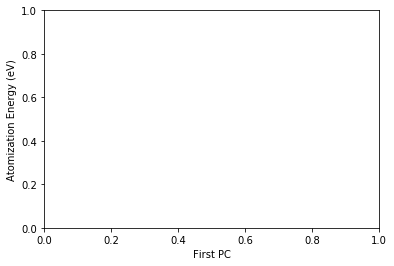

<Figure size 1440x1440 with 0 Axes>

In [18]:
methyl = mpatches.Patch(color='skyblue', label='methyl')
methylene = mpatches.Patch(color='green', label='methylene')
methine = mpatches.Patch(color='lime',label='methine')
alkene = mpatches.Patch(color='tan',label='alkene')
primaryamine = mpatches.Patch(color='tomato',label='primary-amine')
secondaryamine = mpatches.Patch(color='chocolate',label='secondary-amine')
alcohols = mpatches.Patch(color='teal',label='alcohols')
methylO = mpatches.Patch(color='gold',label='methyl-O')
methylN = mpatches.Patch(color='pink',label='methyl-N')
methyleneN = mpatches.Patch(color='orange',label='methylene-N')
methyleneO = mpatches.Patch(color='blue',label='methylene-O')
methineN = mpatches.Patch(color='cyan',label='methine-N')
methineO = mpatches.Patch(color='grey',label='methine-O')
alkeneO = mpatches.Patch(color='lightsteelblue',label='alkene-O')
alkeneN = mpatches.Patch(color='navy',label='alkene-N')

ax = plt.axes()
plt.figure(figsize=(20,20))
ax.set_xlabel('First PC')
#ax.set_ylabel('Third PC')
ax.set_ylabel('Atomization Energy (eV)')


from numpy import genfromtxt
AE = genfromtxt('../../../data/pca-tsne/qm9_i6_30f_10000_5000/fullytrained/5000-test-points/interactions_0/hae.csv', delimiter=',')


ax.scatter(x_pca[:,0],AE,c=label['Target'],cmap=matplotlib.colors.ListedColormap(colorsh))
    

ax.legend(bbox_to_anchor=(1.5, 1.0),handles=[methyl,methylene,
                                             methine,alkene,
                                             primaryamine,secondaryamine,
                                             alcohols,methylO,methylN,
                                             methyleneN,methyleneO,methineN,methineO,
                                             alkeneO,alkeneN])
